In [480]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="whitegrid")

# Загрузка и первичный анализ набора данных
Для обработки пропусков в числовых данных будем использовать набор данных об [автомобилях](https://www.mldata.io/dataset-details/auto_mpg/).
<a id='data_desc'></a>
Набор данных состоит из спецификации автомобилей с описанием различных технических параметров, а также одного неопределенного параметра `origin`. 


<b>Задача регрессии</b> состоит в предсказании расхода топлива автомобиля на основании других параметров.

Колонки:

1. `cylinders` - кол-во цилиндров в двигателе
2. `displacement` -  рабочий объем двигателя
3. `horsepower` - кол-во лошадиных сил
4. `weight` - вес автомобиля
5. `acceleration` - ускорение. кол-во секунд, за которое автомобиль с места достигает скорости в 60 миль/час (~100км/час)
6. `model_year` - год выпуска автомобиля (19xx год)
7. `origin` - неизвестный параметр. будет удален
8. `car_name` - название автомобиля
9. `mpg` - расход топлива в милях на американский галлон (miles/gallon)

In [481]:
data = pd.read_csv('../data/auto_mpg_dataset.csv', sep = ',')
data

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino,17.0
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl,27.0
394,4,97.0,52.0,2130.0,24.6,82,2,vw pickup,44.0
395,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage,32.0
396,4,120.0,79.0,2625.0,18.6,82,1,ford ranger,28.0


In [482]:
# уберем непонятный для нас параметр, чтобы он не помешал в будущем
data = data.drop(columns='origin')
data

,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name,mpg
0,8,307.0,130.0,3504.0,12.0,70,chevrolet chevelle malibu,18.0
1,8,350.0,165.0,3693.0,11.5,70,buick skylark 320,15.0
2,8,318.0,150.0,3436.0,11.0,70,plymouth satellite,18.0
3,8,304.0,150.0,3433.0,12.0,70,amc rebel sst,16.0
4,8,302.0,140.0,3449.0,10.5,70,ford torino,17.0
...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82,ford mustang gl,27.0
394,4,97.0,52.0,2130.0,24.6,82,vw pickup,44.0
395,4,135.0,84.0,2295.0,11.6,82,dodge rampage,32.0
396,4,120.0,79.0,2625.0,18.6,82,ford ranger,28.0


In [483]:
# Размер набора данных (строки, колонки)
data.shape

(398, 8)

In [484]:
# Типы данных в колонках
data.dtypes

cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
car_name         object
mpg             float64
dtype: object

### Проверка на наличие пропущенных значений

In [485]:
data.isnull().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
car_name        0
mpg             0
dtype: int64

Пропущенные значения не найдены.

### Основные статистические показатели для каждого параметра

In [486]:
data.describe()

,cylinders,displacement,horsepower,weight,acceleration,model_year,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,-1404.643216,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,12213.424763,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,-100000.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,46.600000


### Удаление строк с аномальными значениями

В результате анализа статистических данных были обнаружены аномалии у параметра `horsepower`. Количество лошадиных сил всегда должно быть положительным числом. Удалим все строки с аномальными значениями лошадиных сил.

In [487]:
data = data[data.horsepower > 0]
data

,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name,mpg
0,8,307.0,130.0,3504.0,12.0,70,chevrolet chevelle malibu,18.0
1,8,350.0,165.0,3693.0,11.5,70,buick skylark 320,15.0
2,8,318.0,150.0,3436.0,11.0,70,plymouth satellite,18.0
3,8,304.0,150.0,3433.0,12.0,70,amc rebel sst,16.0
4,8,302.0,140.0,3449.0,10.5,70,ford torino,17.0
...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82,ford mustang gl,27.0
394,4,97.0,52.0,2130.0,24.6,82,vw pickup,44.0
395,4,135.0,84.0,2295.0,11.6,82,dodge rampage,32.0
396,4,120.0,79.0,2625.0,18.6,82,ford ranger,28.0


Новый размер набора данных:

In [488]:
data.shape

(392, 8)

Обновленная статистика по столбцам:

In [489]:
data.describe()

,cylinders,displacement,horsepower,weight,acceleration,model_year,mpg
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,23.445918
std,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,7.805007
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,17.000000
50%,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,22.750000
75%,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,46.600000


# Разделение выборки на тестовую и обучающую

Подключим необходимый метод из библиотек sklearn.

In [490]:
from sklearn.model_selection import train_test_split

## Удаление мешающих данных
Столбец `car_name` помешает решению задачи регрессии из-за того, что в нем хранятся "плохие" данные. Столбец хранит названия машин и, строго говоря, это не "категориальные" признаки, и все возможные зависимости между числовым значением названия машины и другими параметрами могут отрицательно повлиять на качество построенной модели. 

Однако просто удалять столбец из набора данных не хочется, ведь задача регрессии решается как раз для того, чтобы пользователю было выведено <u>название машины</u> и предсказанный <u>расход топлива</u>. Вдруг столбец понадобится в будущем. Сохраним его отдельно и используем `LabelEncoder` для преобразования этих данных в числовые.

Столбец `model_year` тоже удалим.

In [491]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_car_names = le.fit_transform(data['car_name'])
print(data_car_names)
data = data.drop(columns = ['car_name', 'model_year'])
print('\n\nИтоговый набор данных:\n\n', data.head())

[ 48  35 229  13 159 140  53 221 239   1 100 213  56  29 270 218   7 149
  94 278 209  15 254  21   6 132  67 111 161  94  64 267   6 230  48 160
   9  53 240 140 221 115 128 248   8  63 241 150 185 206 208 122 263  75
 282 216 268 104 289  62 156  53 239 221 140   2 190  30 201  74 181  10
  47 142 231 291 279 210 251 155  84 275 103 264  24   9  54 141 108 191
  43 147 220  73  28   0 233  61   7 149 218 288  53 127 217 205   6 259
  62  86 172 154 186 120  58 242 123 207  16 290 112 256 272 202 218   7
  60  91 154 263  62  49   9 232 141  26 109 142  10  20 280 207 267  87
 102 123 121 165 257 126 234  60 192 149 239  41 222 147  23  40   9 219
  33  59 152 262 154   6 238 267 280  87 154 283  11  16 209 292 256 169
 124 206  39 102 252  49 107   9 141 233  60 149   7  50  65 298 165  99
 144 250  12 283  90 262 154 293 237 209 272 184  38  66 131 110 163  31
 253 214  93  43 200 116 187  52  34 236 143 243  57  69 158 284 249 265
 153  50 106 258 280  88  22 179 285 138 178  92 16

Разделим выборку на входные и выходные данные:

In [492]:
parts = np.split(data, [5,6], axis=1)
X = parts[0]
Y = parts[1]
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    cylinders  displacement  horsepower  weight  acceleration
0        8.0         307.0       130.0  3504.0          12.0
1        8.0         350.0       165.0  3693.0          11.5
2        8.0         318.0       150.0  3436.0          11.0
3        8.0         304.0       150.0  3433.0          12.0
4        8.0         302.0       140.0  3449.0          10.5 

Выходные данные:

     mpg
0  18.0
1  15.0
2  18.0
3  16.0
4  17.0


Наконец, разделим выборку на обучающую и тестовую.

In [493]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, test_size=0.05)

In [494]:
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

      cylinders  displacement  horsepower  weight  acceleration
75         8.0         318.0       150.0  4077.0          14.0
389        6.0         232.0       112.0  2835.0          14.7
257        6.0         232.0        90.0  3210.0          17.2
178        4.0         120.0        88.0  2957.0          17.0
19         4.0          97.0        46.0  1835.0          20.5 

Входные параметры тестовой выборки:

      cylinders  displacement  horsepower  weight  acceleration
2          8.0         318.0       150.0  3436.0          11.0
347        4.0          85.0        65.0  1975.0          19.4
45         6.0         258.0       110.0  2962.0          13.5
224        8.0         302.0       130.0  4295.0          14.9
214        8.0         302.0       130.0  3870.0          15.0 

Выходные параметры обучающей выборки:

       mpg
75   14.0
389  22.0
257  19.4
178  23.0
19   26.0 

Выходные параметры тестовой выборки:

       mpg
2    18.0
34

Проверим правильность разделения выборки на тестовую и обучающую. Посмотрим на размеры матриц.

In [495]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(372, 5)
(20, 5)
(372, 1)
(20, 1)


# Модель ближайших соседей для произвольного гиперпараметра K

Импортируем класс `KNeighborsRegressor` из sklearn для решения задачи регрессии методом K ближайших соседей

In [496]:
from sklearn.neighbors import KNeighborsRegressor

## Построение моделей с разным количеством соседей

In [497]:
# Решение задачи регрессии методом 2, 5 и 10 ближайших соседей
Regressor_2NN = KNeighborsRegressor(n_neighbors = 2)
Regressor_5NN = KNeighborsRegressor()
Regressor_10NN = KNeighborsRegressor(n_neighbors = 10)
print('Пример модели:\n\n', Regressor_10NN)

Пример модели:

 KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')


## Предсказание

In [498]:
Regressor_2NN.fit(X_train, Y_train)
Regressor_5NN.fit(X_train, Y_train)
Regressor_10NN.fit(X_train, Y_train)
target_2NN = Regressor_2NN.predict(X_test)
target_5NN = Regressor_5NN.predict(X_test)
target_10NN = Regressor_10NN.predict(X_test)
print('Пример предсказанных значений:\n\n', target_10NN[:5], '\n  ...')

Пример предсказанных значений:

 [[19.08]
 [32.68]
 [22.3 ]
 [14.59]
 [16.07]] 
  ...


## Оценка качества регрессии

In [499]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score 

### Оценка средней абсолютной ошибки

In [500]:
print('Средняя абсолютная ошибка для 2 ближайших соседей:',mean_absolute_error(Y_test, target_2NN))
print('Средняя абсолютная ошибка для 5 ближайших соседей:',mean_absolute_error(Y_test, target_5NN))
print('Средняя абсолютная ошибка для 10 ближайших соседей:',mean_absolute_error(Y_test, target_10NN))

Средняя абсолютная ошибка для 2 ближайших соседей: 3.4400000000000004
Средняя абсолютная ошибка для 5 ближайших соседей: 3.8709999999999996
Средняя абсолютная ошибка для 10 ближайших соседей: 4.082000000000001


### Оценка средней квадратичной ошибки

In [501]:
print('Средняя квадратичная ошибка для 2 ближайших соседей:',mean_squared_error(Y_test, target_2NN))
print('Средняя квадратичная ошибка для 5 ближайших соседей:',mean_squared_error(Y_test, target_5NN))
print('Средняя квадратичная ошибка для 10 ближайших соседей:',mean_squared_error(Y_test, target_10NN))

Средняя квадратичная ошибка для 2 ближайших соседей: 26.08625
Средняя квадратичная ошибка для 5 ближайших соседей: 30.04098
Средняя квадратичная ошибка для 10 ближайших соседей: 32.27179


### Оценка median absolute error

In [502]:
print('Median absolute error для 2 ближайших соседей:',median_absolute_error(Y_test, target_2NN))
print('Median absolute error для 5 ближайших соседей:',median_absolute_error(Y_test, target_5NN))
print('Median absolute error для 10 ближайших соседей:',median_absolute_error(Y_test, target_10NN))

Median absolute error для 2 ближайших соседей: 2.0
Median absolute error для 5 ближайших соседей: 3.370000000000001
Median absolute error для 10 ближайших соседей: 4.15


### Оценка коэффициента детерминации

In [503]:
print('Коэффициент детерминации для 2 ближайших соседей:',r2_score(Y_test, target_2NN))
print('Коэффициент детерминации для 5 ближайших соседей:',r2_score(Y_test, target_5NN))
print('Коэффициент детерминации для 10 ближайших соседей:',r2_score(Y_test, target_10NN))

Коэффициент детерминации для 2 ближайших соседей: 0.6646902743308829
Коэффициент детерминации для 5 ближайших соседей: 0.61385661938257
Коэффициент детерминации для 10 ближайших соседей: 0.5851820383630703


Принимая во внимание все четыре оценки, лучше всех себя показал метод 2 ближайших соседей. Продолжим увеличивать кол-во соседей.

In [504]:
Regressor_50NN = KNeighborsRegressor(n_neighbors = 50)
Regressor_50NN.fit(X_train, Y_train)
target_50NN = Regressor_50NN.predict(X_test)
print('Средняя абсолютная ошибка для 50 ближайших соседей:',mean_absolute_error(Y_test, target_50NN))
print('Средняя квадратичная ошибка для 50 ближайших соседей:',mean_squared_error(Y_test, target_50NN))
print('Median absolute error для 50 ближайших соседей:',median_absolute_error(Y_test, target_50NN))
print('Коэффициент детерминации для 50 ближайших соседей:',r2_score(Y_test, target_50NN))

Средняя абсолютная ошибка для 50 ближайших соседей: 3.707
Средняя квадратичная ошибка для 50 ближайших соседей: 27.412709199999995
Median absolute error для 50 ближайших соседей: 3.3770000000000024
Коэффициент детерминации для 50 ближайших соседей: 0.6476401168546924


При использовании 50 ближайших соседей улучшились все показатели по сравнению с 10 соседями. Увеличим кол-во соседей еще в два раза.

In [505]:
Regressor_100NN = KNeighborsRegressor(n_neighbors = 100)
Regressor_100NN.fit(X_train, Y_train)
target_100NN = Regressor_100NN.predict(X_test)
print('Средняя абсолютная ошибка для 100 ближайших соседей:',mean_absolute_error(Y_test, target_100NN))
print('Средняя квадратичная ошибка для 100 ближайших соседей:',mean_squared_error(Y_test, target_100NN))
print('Median absolute error для 100 ближайших соседей:',median_absolute_error(Y_test, target_100NN))
print('Коэффициент детерминации для 100 ближайших соседей:',r2_score(Y_test, target_100NN))

Средняя абсолютная ошибка для 100 ближайших соседей: 3.9019500000000003
Средняя квадратичная ошибка для 100 ближайших соседей: 26.144045650000002
Median absolute error для 100 ближайших соседей: 3.542
Коэффициент детерминации для 100 ближайших соседей: 0.6639473755414298


Теперь ухудшились все показатели. Из описанного выше можно только сделать достаточно очевидный и без вычислений вывод о том, что оптимальное кол-во ближайших соседей находится между 2 и 100.

## Кросс-валидация

### Kfold


Оценим с помощью Kfold качество нашей модели с разным кол-вом ближайших соседей. Будем использовать 5 фолдов.

In [506]:
from sklearn.model_selection import cross_val_score

scores_2NN = cross_val_score(KNeighborsRegressor(n_neighbors = 2), X, Y, cv=5, scoring = 'r2')
scores_5NN = cross_val_score(KNeighborsRegressor(n_neighbors = 5), X, Y, cv=5, scoring = 'r2')
scores_10NN = cross_val_score(KNeighborsRegressor(n_neighbors = 10), X, Y, cv=5, scoring = 'r2')
scores_50NN = cross_val_score(KNeighborsRegressor(n_neighbors = 50), X, Y, cv=5, scoring = 'r2')
scores_100NN = cross_val_score(KNeighborsRegressor(n_neighbors = 100), X, Y, cv=5, scoring = 'r2')
print('Пример значений коэф. детерминации для 5 фолдов для метода 10 ближайших соседей: \n', scores_10NN, '\n\n')
print('Усредненное значение коэффициента детерминации для:\n')
print('- 2 ближайших соседей:', np.mean(scores_2NN), '\n')
print('- 5 ближайших соседей:', np.mean(scores_5NN), '\n')
print('- 10 ближайших соседей:', np.mean(scores_10NN), '\n')
print('- 50 ближайших соседей:', np.mean(scores_50NN), '\n')
print('- 100 ближайших соседей:', np.mean(scores_100NN), '\n')

Пример значений коэф. детерминации для 5 фолдов для метода 10 ближайших соседей: 
 [ 0.50464412  0.46849655  0.75209782  0.72046562 -0.69417834] 


Усредненное значение коэффициента детерминации для:

- 2 ближайших соседей: 0.2975303228828431 

- 5 ближайших соседей: 0.3332088003844808 

- 10 ближайших соседей: 0.35030515295098524 

- 50 ближайших соседей: 0.34157127748057753 

- 100 ближайших соседей: 0.27097145320439053 



Можно сделать вывод, что модель обучается плохо. Скорее всего не хватает данных для точного обучения. Или не хватает дополнительных колонок для более точного нахождения зависимости между данными.

Проверим модель другими методами.

### Repeated Kfold

Повторим разбиение на 5 фолдов 3 раза.

In [507]:
from sklearn.model_selection import RepeatedKFold

repKF = RepeatedKFold(n_splits = 5, n_repeats = 3)

scores_2NN = cross_val_score(KNeighborsRegressor(n_neighbors = 2), X, Y, cv=repKF, scoring = 'r2')
scores_5NN = cross_val_score(KNeighborsRegressor(n_neighbors = 5), X, Y, cv=repKF, scoring = 'r2')
scores_10NN = cross_val_score(KNeighborsRegressor(n_neighbors = 10), X, Y, cv=repKF, scoring = 'r2')
scores_50NN = cross_val_score(KNeighborsRegressor(n_neighbors = 50), X, Y, cv=repKF, scoring = 'r2')
scores_100NN = cross_val_score(KNeighborsRegressor(n_neighbors = 100), X, Y, cv=repKF, scoring = 'r2')

print('Пример значений коэф. детерминации для 5x3 фолдов для метода 10 ближайших соседей: \n', scores_10NN, '\n\n')

print('Усредненное значение коэффициента детерминации для:\n')
print('- 2 ближайших соседей:', np.mean(scores_2NN), '\n')
print('- 5 ближайших соседей:', np.mean(scores_5NN), '\n')
print('- 10 ближайших соседей:', np.mean(scores_10NN), '\n')
print('- 50 ближайших соседей:', np.mean(scores_50NN), '\n')
print('- 100 ближайших соседей:', np.mean(scores_100NN), '\n')

Пример значений коэф. детерминации для 5x3 фолдов для метода 10 ближайших соседей: 
 [0.77128725 0.77988646 0.60069694 0.73236287 0.66606622 0.65846759
 0.69399229 0.73781613 0.6994416  0.77420519 0.80819445 0.60204938
 0.68733978 0.71213418 0.73253435] 


Усредненное значение коэффициента детерминации для:

- 2 ближайших соседей: 0.6480864251608416 

- 5 ближайших соседей: 0.6905480829890646 

- 10 ближайших соседей: 0.7104316444729183 

- 50 ближайших соседей: 0.7122298732283404 

- 100 ближайших соседей: 0.6868673417164823 



Получена более качественная оценка. Но ноэффициент детерминации не дотягивает до хорошего уровня в 0.8.

### ShuffleSplit

Перемешаем данные 5 раз.

In [508]:
from sklearn.model_selection import ShuffleSplit

ShufSp = ShuffleSplit(n_splits = 5, test_size = 0.1)

scores_2NN = cross_val_score(KNeighborsRegressor(n_neighbors = 2), X, Y, cv=ShufSp, scoring = 'r2')
scores_5NN = cross_val_score(KNeighborsRegressor(n_neighbors = 5), X, Y, cv=ShufSp, scoring = 'r2')
scores_10NN = cross_val_score(KNeighborsRegressor(n_neighbors = 10), X, Y, cv=ShufSp, scoring = 'r2')
scores_50NN = cross_val_score(KNeighborsRegressor(n_neighbors = 50), X, Y, cv=ShufSp, scoring = 'r2')
scores_100NN = cross_val_score(KNeighborsRegressor(n_neighbors = 100), X, Y, cv=ShufSp, scoring = 'r2')

print('Пример значений коэф. детерминации для ShuffleSplit для метода 10 ближайших соседей: \n', scores_10NN, '\n\n')

print('Усредненное значение коэффициента детерминации для:\n')
print('- 2 ближайших соседей:', np.mean(scores_2NN), '\n')
print('- 5 ближайших соседей:', np.mean(scores_5NN), '\n')
print('- 10 ближайших соседей:', np.mean(scores_10NN), '\n')
print('- 50 ближайших соседей:', np.mean(scores_50NN), '\n')
print('- 100 ближайших соседей:', np.mean(scores_100NN), '\n')

Пример значений коэф. детерминации для ShuffleSplit для метода 10 ближайших соседей: 
 [0.80778202 0.80749684 0.61090778 0.76462636 0.763104  ] 


Усредненное значение коэффициента детерминации для:

- 2 ближайших соседей: 0.5843657674236209 

- 5 ближайших соседей: 0.6518866060663995 

- 10 ближайших соседей: 0.7507834019910662 

- 50 ближайших соседей: 0.7267589021065832 

- 100 ближайших соседей: 0.6891653399027753 



Коэффициент детерминации постоянно получается разный. В зависимости от перемешиваний иногда даже наблюдается линейная зависимость от кол-ва соседей. ShuffleSplit работает странно. Возможно, дело в недостатке данных или в размере обучающей выборки.

## Подбор гиперпараметров

### GridSearch через среднюю квадратичную ошибку

Рассмотрим все количества ближайших соседей от 1 до 100, чтобы найти лучший результат. Возьмем 10 фолдов.

In [509]:
from sklearn.model_selection import GridSearchCV

n_range = np.array(range(1, 101, 1))
tuned_parameters = [{'n_neighbors': n_range}]
gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=10, scoring='neg_mean_squared_error')
gs.fit(X_train, Y_train)

C:\Users\volko\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  9

In [510]:
print('Лучшая модель:\n\n', gs.best_estimator_)
print('\nЛучшее число ближайших соседей:\n\n',gs.best_params_)
print('\nЛучшее значение средней квадратичной ошибки:\n\n',gs.best_score_)

Лучшая модель:

 KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=36, p=2,
                    weights='uniform')

Лучшее число ближайших соседей:

 {'n_neighbors': 36}

Лучшее значение средней квадратичной ошибки:

 -16.57017386001593


Изменение качества тестовой выборки в зависимости от кол-ва соседей:



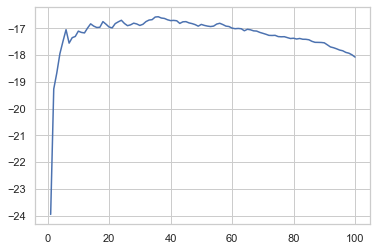

In [511]:
print('Изменение качества тестовой выборки в зависимости от кол-ва соседей:\n')
plt.plot(n_range, gs.cv_results_['mean_test_score'])

### GridSearch через коэффициент детерминации

Лучшая модель:

 KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=36, p=2,
                    weights='uniform')

Лучшее число ближайших соседей:

 {'n_neighbors': 36}

Лучшее значение коэффициента детерминации:

 0.7270493566823003

Изменение качества тестовой выборки в зависимости от кол-ва соседей:



C:\Users\volko\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


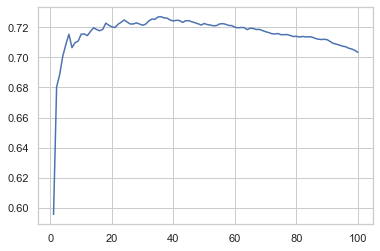

In [522]:
gs_det = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=10, scoring='r2')
gs_det.fit(X_train, Y_train)
print('Лучшая модель:\n\n', gs_det.best_estimator_)
print('\nЛучшее число ближайших соседей:\n\n',gs_det.best_params_)
print('\nЛучшее значение коэффициента детерминации:\n\n',gs_det.best_score_)
print('\nИзменение качества тестовой выборки в зависимости от кол-ва соседей:\n')
plt.plot(n_range, gs_det.cv_results_['mean_test_score'])

Запуск GridSearch проводился несколько раз, и каждый раз выдавались сильно разнящиеся значения. Было принято решение остановиться на моменте, когда лучшее количество соседей совпало. 36 соседей это, безусловно, слишком много для точного решения задачи регрессии.

Из всех полученных данных можно сделать вывод, что для качественного предсказания расхода топлива на основе других технических параметров требуется намного больший размер обучающей выборки, чем был предоставлен сейчас. 

## Кривая обучения

In [513]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Кол-во записей")
    plt.ylabel("Оценка")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Оценка обучающей выборки")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Оценка кросс-валидации")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\volko\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

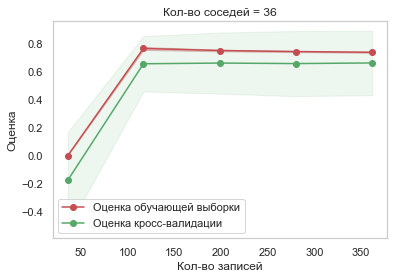

In [521]:

plot_learning_curve(KNeighborsRegressor(n_neighbors=36), 'Кол-во соседей = 36', 
                    X_train, Y_train, cv=40)

Видно, что при увеличении кол-ва записей обучение проводится все лучше и лучше. Еще раз делается вывод о том, что для хорошего обучения не хватает кол-ва записей.

## Кривая валидации

In [515]:
from sklearn.model_selection import validation_curve
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring="accuracy"):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel(str(scoring))
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Оценка обучения",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.4,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Оценка кросс-валидации",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\volko\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

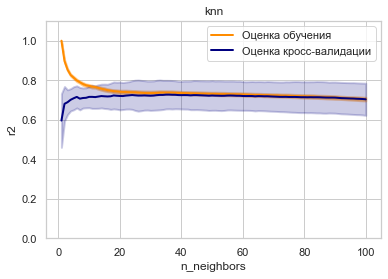

In [516]:
plot_validation_curve(KNeighborsRegressor(), 'knn', 
                      X_train, Y_train, 
                      param_name='n_neighbors', param_range=n_range, 
                      cv=10, scoring="r2")

Резкого спада оценки при увеличении количества соседей нет.

Проверим то же самое на средней квадратичной ошибке. Для этого потребуется немного поменять функцию построения графика, т.к. в данном случае вычисляется [отрицательное значение средней квадратичной ошибки](https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules).

<module 'matplotlib.pyplot' from 'C:\\Users\\volko\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

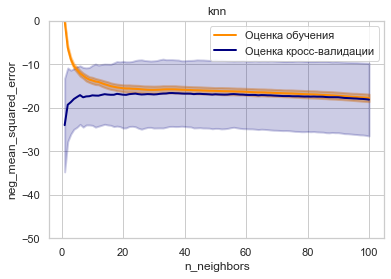

In [524]:
def plot_validation_curve2(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring="accuracy"):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel(str(scoring))
    plt.ylim(-50, 0)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Оценка обучения",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.4,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Оценка кросс-валидации",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt
plot_validation_curve2(KNeighborsRegressor(), 'knn', 
                      X_train, Y_train, 
                      param_name='n_neighbors', param_range=n_range, 
                      cv=10, scoring="neg_mean_squared_error")

Также резкого спада оценки нет. Все же для хорошего обучения недостаточно данных.

При выполнении лабораторной работы подбирались различные размеры тестовой и обучающей выборки. Качество обучения никогда не менялось в лучшую сторону. Коэффициент детерминации всегда держался около 0.7. Другие оценки также варьировались несильно.

Возможно, обучение проводилось неверно из-за того, что входные и выходные данные были не `numpy array`. Мною была создана копия проекта, в которой было изменен только формат этих данных. Результат оказался таким же.